In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
import mysql.connector as sql
import pandas as pd 
import pickle
# plt.rcParams["figure.figsize"] = (10, 6)

# data = pd.read_csv('D:/IOT/heart_dataset.csv')

# data.head()

my_conn = sql.connect(
      host="sql6.freesqldatabase.com", database="sql6585183", user="sql6585183", password="KXRjZwwCfW"
    )
####### end of connection ####
data = pd.read_sql("SELECT * FROM dataset ",my_conn)
data.head()







C:\Users\ThanhNT\AppData\Local\Temp\ipykernel_4924\3356256116.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql("SELECT * FROM dataset ",my_conn)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,4,111,170,0,2,150,0,0.3,1,0,3,0
1,48,0,3,118,285,0,0,145,0,0.3,2,1,3,1
2,47,1,4,115,312,0,0,187,0,1.3,2,0,3,1
3,51,1,3,96,237,0,0,156,1,0.5,1,1,3,1
4,51,1,3,99,227,0,0,155,1,0.2,1,1,3,1


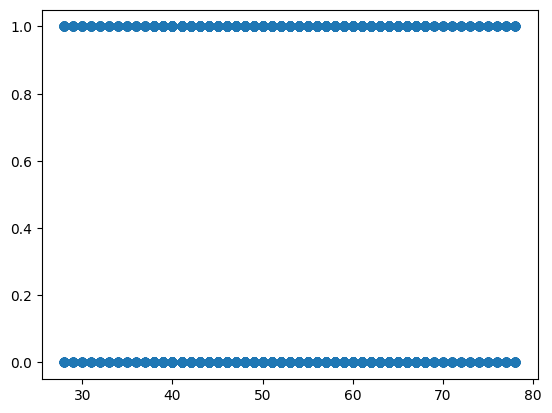

In [11]:
plt.scatter(data['age'], data['target'])
plt.show()

# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    data['age'], data['target'], test_size=0.50)


In [12]:
# Creating the logistic regression model

# Helper function to normalize data
def normalize(X):
    return X - X.mean()

# Method to make predictions


def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# Method to train the model


def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        # Derivative of loss wrt b0
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        # Derivative of loss wrt b1
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1

    return b0, b1




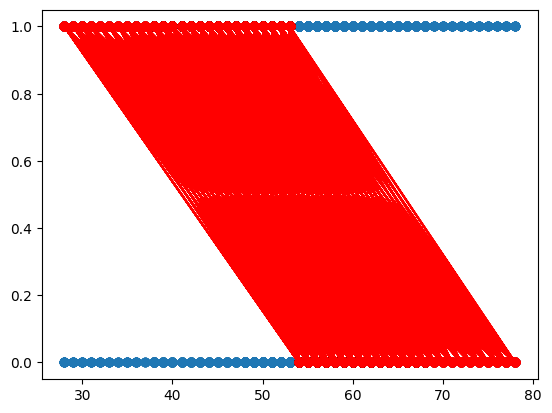

Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:1
Dự đoán:0
Dự đoán:0
Dự đoán:0
Dự đoán:1


In [13]:
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions
# X_test = X_test.sort_values()  # Sorting values is optional only to see the line graph
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.plot(X_test, y_pred, c="red", linestyle='-', marker='o') # Only if values are sorted
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
        print(f"Dự đoán:{y_pred[y_test.iloc[i]]}")
        gb=y_pred[y_test.iloc[i]]
print(f"Accuracy = {accuracy / len(y_pred)*100}"+'%')


c:\Users\ThanhNT\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


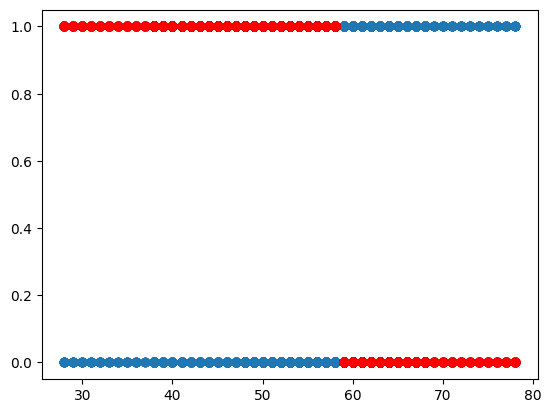


Accuracy = 58.89838556505224%


In [14]:
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Making predictions
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()
print()
# Accuracy
print(
    f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))*100}%")


In [15]:
with open('model.pkl', 'wb') as file:
    pickle.dump(gb, file)

In [16]:
import joblib
model = joblib.load('model.pkl') 
print(model)

0
